In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import unidecode
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## 3. Feature Engineering

In [2]:
old_df = pd.read_csv('data/cleaned_data.csv')
old_df.head()

,District,Category,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
0,district-1,Ban nha rieng ben hong Chung cu 353 Nguyen Trai Quan 1,2.0,1.0,North,Empty,Pink book,51.5,65.4,7.00,7.10,2.0,5.3,102.9,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,district-1,"Nha hem Trung tam Quan 1, gan cau Ong Lanh, so hong chinh chu!",3.0,3.0,North,Living,Pink book,57.6,171.6,10.57,4.90,2.2,11.5,199.7,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,district-1,"Nha ngay nga tu Co Bac - De Tham, Quan 1 noi that co ban, so hong chinh chu!",2.0,2.0,North,Living,Pink book,20.0,60.0,5.00,4.00,1.5,3.5,175.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,district-1,BAN NHA HEM 1 XET PHUONG CAU KHO QUAN 1 - HEM XE HOI,3.0,3.0,South,Living,Pink book,26.5,106.0,5.10,6.90,4.9,9.5,358.5,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,district-1,Ban nha nguyen can hem xe o to Phuong Ben Nghe Quan 1,4.0,4.0,North,Living,Pink book,28.3,38.8,2.87,4.29,4.0,8.5,300.4,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Remove price outliers

In [3]:
# def remove_outlier(df,column):
#     df_temp = df.copy()
#     # df_temp[column] = np.log(df_temp[column]+1)
#     q1 = df_temp[column].quantile(0.25)
#     q3 = df_temp[column].quantile(0.75)
#     iqr = q3 - q1
#     left_tail = q1-1.5*iqr
#     right_tail = q3+1.5*iqr
#     print(f'Outliers of column {column} are outside the range from {left_tail} to {right_tail}')
    
#     return df_temp[(df_temp[column] < left_tail) | (df_temp[column] > right_tail)].index

# old_df.drop(remove_outlier(old_df,'Price (bil)'),inplace=True)
# old_df.reset_index(drop=True,inplace=True)

In [4]:
def remove_outlier(df,column):
    df_temp = df.copy()
    mean = df_temp[column].mean()
    std = df_temp[column].std()
    left_tail = mean-3*std
    right_tail = mean+3*std
    print(f'Outliers of column {column} are outside the range from {left_tail} to {right_tail}')

    return df_temp[(df_temp[column] < left_tail) | (df_temp[column] > right_tail)].index

old_df.drop(remove_outlier(old_df,'Price (bil)'),inplace=True)
old_df.reset_index(drop=True,inplace=True)

Outliers of column Price (bil) are outside the range from -24.07285795323259 to 40.19514634877113


### Handle categorical variables

In [5]:
#List of categorical variables
categorical_features = list(old_df.select_dtypes(include='object').columns)
categorical_features

['District', 'Category', 'Direction', 'House Status', 'Verification']

In [6]:
#Label encoding 
for feature in categorical_features:
    if feature != 'Category':
        labels_ordered=old_df.groupby([feature])['Price (bil)'].median().sort_values().index
        labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
        old_df[feature]=old_df[feature].map(labels_ordered)

### Log transformation data

- We make a log transformation with features that are very high skewed.

In [7]:
skewed_features = ['Land Area (m2)','Land Used Area (m2)','Length (m)','Width (m)','Alley Width (m)']
df = old_df.copy()
df[skewed_features] = np.log(df[skewed_features]+1)

### Complete missing values

In [8]:
#Make the list of features which has missing values
features_with_na = [col for col in df.columns if (df[col].isnull().sum()>0)]
#Print the features name and the percentage of missing values
for feature in features_with_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)} % missing values')

Bedroom: 2.0214 % missing values
Bathroom: 0.3197 % missing values
Length (m): 0.0054 % missing values
Alley Width (m): 24.1695 % missing values
Floor: 1.2302 % missing values


In [9]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
District,1.000000,0.144414,0.146204,0.028524,0.062873,0.005313,0.276407,0.255347,0.225779,0.213585,0.079402,0.275344,0.586873,0.302104,0.096161,0.152651,0.027919,0.038558,0.261528,0.188561,0.255689,0.087137,0.072174,0.202858,0.222365,0.098278,0.007816,0.015328,0.030362,0.034426
Bedroom,0.144414,1.000000,0.941446,0.008686,0.263623,0.009517,0.102854,0.539063,0.109382,0.043681,0.112260,0.372704,0.219588,0.522238,0.134141,0.293548,0.193569,0.021722,0.386927,0.006294,0.001752,0.047045,0.013262,0.023456,0.025922,0.093763,0.079145,0.039808,0.028638,0.006781
Bathroom,0.146204,0.941446,1.000000,0.013241,0.240474,0.005131,0.096265,0.515100,0.095467,0.051204,0.126393,0.367820,0.223221,0.530584,0.125300,0.326875,0.200727,0.022124,0.354931,0.012833,0.002809,0.053879,0.024965,0.016080,0.009974,0.104074,0.084451,0.039168,0.033384,0.006971
Direction,0.028524,0.008686,0.013241,1.000000,0.015149,0.000646,0.034852,0.034205,0.017411,0.043649,0.007858,0.016448,0.025767,0.016396,0.011928,0.007543,0.010134,0.008575,0.035176,0.014116,0.012777,0.005935,0.037329,0.022788,0.068421,0.034655,0.016980,0.007586,0.007130,0.033763
House Status,0.062873,0.263623,0.240474,0.015149,1.000000,0.042334,0.024196,0.286867,0.046638,0.015019,0.012541,0.127286,0.083887,0.132626,0.098745,0.020175,0.018140,0.012835,0.270190,0.032365,0.065867,0.060088,0.035412,0.001116,0.029263,0.036607,0.007955,0.034903,0.029050,0.005952
Verification,0.005313,0.009517,0.005131,0.000646,0.042334,1.000000,0.037462,0.022928,0.077068,0.018225,0.008768,0.052741,0.034661,0.044569,0.024434,0.012693,0.011664,0.004385,0.029833,0.038989,0.035428,0.028036,0.050772,0.045620,0.063437,0.055750,0.097565,0.014432,0.011917,0.000504
Land Area (m2),0.276407,0.102854,0.096265,0.034852,0.024196,0.037462,1.000000,0.160340,0.845277,0.720089,0.314792,0.495877,0.412930,0.290137,0.091535,0.048776,0.046665,0.002751,0.392241,0.065910,0.116864,0.030557,0.040845,0.116078,0.078172,0.021505,0.061614,0.028760,0.037777,0.053996
Land Used Area (m2),0.255347,0.539063,0.515100,0.034205,0.286867,0.022928,0.160340,1.000000,0.087159,0.191433,0.023394,0.263780,0.351535,0.720800,0.194847,0.326464,0.075394,0.046050,0.925655,0.010933,0.030343,0.060531,0.012337,0.096917,0.070612,0.163927,0.103933,0.029679,0.044318,0.040438
Length (m),0.225779,0.109382,0.095467,0.017411,0.046638,0.077068,0.845277,0.087159,1.000000,0.315535,0.351608,0.449410,0.305934,0.226059,0.060858,0.006926,0.039748,0.003821,0.304480,0.067180,0.110573,0.022064,0.023631,0.083456,0.044203,0.021997,0.048967,0.018958,0.030845,0.044378
Width (m),0.213585,0.043681,0.051204,0.043649,0.015019,0.018225,0.720089,0.191433,0.315535,1.000000,0.134645,0.342181,0.302957,0.242173,0.089959,0.080096,0.034244,0.006143,0.328122,0.021989,0.058137,0.032232,0.028440,0.088529,0.069061,0.007148,0.048446,0.014662,0.032595,0.032662


- We found that:
    - Bedroom has a strong relationship with Bathroom
    - Bedroom, Bathroom has a strong relationship with Land Used Area (m2), Floor
    - Length has a strong relationship with Land Area (m2), Width (m)
    - Floor has a strong relationship with Land Used Area (m2), Bedroom, Bathroom, Price/m2 (mil)
- With these above features, we will use these relationship to complete the missing values.
- With Other missing values, we will drop them.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
def complete_na(data,feature_na,features_pred):
    df = data[features_pred]
    df[feature_na] = data[feature_na]
    df.dropna(inplace=True)
    X_train,X_test,y_train,y_test = train_test_split(df[features_pred],df[feature_na],random_state=3107)
    model = DecisionTreeRegressor()
    model.fit(X_train,y_train)

    return model

In [12]:
#Fill missing values of columns Length (m), Floor, Bathroom, Bedroom
df.loc[df['Length (m)'].isnull(),'Length (m)'] = complete_na(df,feature_na = 'Length (m)', features_pred = ['Land Area (m2)','Width (m)'])\
    .predict(df.loc[df['Length (m)'].isnull(),['Land Area (m2)','Width (m)']])
df.loc[df['Floor'].isnull(),'Floor'] = complete_na(df,feature_na = 'Floor', features_pred = ['Land Used Area (m2)', 'Price/m2 (mil)'])\
    .predict(df.loc[df['Floor'].isnull(),['Land Used Area (m2)', 'Price/m2 (mil)']]).astype(int)
df.loc[df['Bathroom'].isnull(),'Bathroom'] = complete_na(df,feature_na = 'Bathroom',features_pred = ['Land Used Area (m2)','Floor'])\
    .predict(df.loc[df['Bathroom'].isnull(),['Land Used Area (m2)','Floor']]).astype(int)
df.loc[df['Bedroom'].isnull(),'Bedroom'] = complete_na(df,feature_na = 'Bedroom',features_pred = ['Bathroom'])\
    .predict(df.loc[df['Bedroom'].isnull(),['Bathroom']]).astype(int)

In [13]:
#Drop others missing values
df.dropna(inplace=True)
old_df = old_df.loc[df.index]
df.reset_index(drop=True,inplace=True)
old_df.reset_index(drop=True,inplace=True)

### Create new features

In [14]:
#Extract information from header
def return_index_category(df_temp,column,key):
    index = df_temp[df_temp[column].str.lower().str.contains(key)].index
    df_temp.drop(index,inplace=True)

    return index

#Remove anccents
cate = [unidecode.unidecode(i) for i in df['Category']]
df['Category'] = cate
#Create temporary data frame and a list for saving information from header
short_category = np.empty(len(df),dtype='object')
temp = df.copy()
land_index = temp[temp['Is Land']==1].index
short_category[land_index] = 'land'
temp.drop(land_index,inplace=True)

short_category[return_index_category(temp,'Category','shophouse')] = 'shophouse'
short_category[return_index_category(temp,'Category','nha hem')] = 'house'
short_category[return_index_category(temp,'Category','nha mat tien')] = 'townhouse'
short_category[return_index_category(temp,'Category','khach san')] = 'hotel-villa'
short_category[return_index_category(temp,'Category','nha rieng')] = 'house'
short_category[return_index_category(temp,'Category','can ho')] = 'condominium'
short_category[return_index_category(temp,'Category','day tro')] = 'boarding house'
short_category[return_index_category(temp,'Category','phong tro')] = 'boarding house'
short_category[return_index_category(temp,'Category','nha tro ')] = 'boarding house'
short_category[return_index_category(temp,'Category','can goc')] = 'townhouse'
short_category[return_index_category(temp,'Category','nguyen can')] = 'condominium'
short_category[return_index_category(temp,'Category','biet thu')] = 'hotel-villa'
short_category[return_index_category(temp,'Category','nha')] = 'house'
short_category[return_index_category(temp,'Category','chung cu')] = 'condominium'
short_category[temp.index] = 'others'

#Re-assigned to Category column
df['Category'] = short_category
old_df['Category'] = short_category

In [15]:
df['Category'].value_counts()

house             11437
land               1620
condominium         310
boarding house      239
townhouse           229
hotel-villa         121
others               37
Name: Category, dtype: int64

- We found that there are six common types: house, land, town house, hotel-villa, condominium and boarding house. And we will drop others category.

In [16]:
df = df[df['Category'].isin(['house','townhouse','hotel-villa','boarding house','condominium','land'])]
old_df = old_df[old_df['Category'].isin(['house','townhouse','hotel-villa','boarding house','condominium','land'])]
df.reset_index(drop=True,inplace=True)
old_df.reset_index(drop=True,inplace=True)

- We also drop redundant column Is Land

In [17]:
df.drop('Is Land',axis=1,inplace=True)
old_df.drop('Is Land',axis=1,inplace=True)

- Oversampling data due to imbalanced category

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# split into input and output elements
X, y = df.drop('Category',axis=1), df['Category']
# transform the dataset
strategy = {'house':12000, 'land':10000, 'condominium':10000, 'boarding house':10000, 'townhouse':10000, 'hotel-villa':8000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

df = pd.merge(X,y,left_index=True,right_index=True)
df

,District,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale,Category
0,17,2.000000,1.000000,3,1,2,3.960813,4.195697,2.079442,2.091864,1.098612,5.300000,102.900000,2.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,house
1,17,3.000000,3.000000,3,2,2,4.070735,5.150977,2.448416,1.774952,1.163151,11.500000,199.700000,3.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,house
2,17,2.000000,2.000000,3,2,2,3.044522,4.110874,1.791759,1.609438,0.916291,3.500000,175.000000,3.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,house
3,17,3.000000,3.000000,4,2,2,3.314186,4.672829,1.808289,2.066863,1.774952,9.500000,358.500000,4.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,house
4,17,4.000000,4.000000,3,2,2,3.377588,3.683867,1.353255,1.665818,1.609438,8.500000,300.400000,5.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,15,3.317294,2.544863,4,2,2,3.772844,4.915817,2.427303,1.648736,1.753092,6.853184,152.655137,3.544863,0.000000,0.772431,0.0,0.0,0.772431,0.772431,0.772431,0.772431,0.772431,0.772431,0.000000,0.000000,0.0,0.0,0.0,townhouse
59996,2,2.533511,2.266755,4,2,2,3.332689,4.152767,2.208843,1.472658,1.945910,1.766689,65.293298,2.266755,0.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.266755,0.0,0.0,0.0,townhouse
59997,5,1.000000,1.631259,3,2,2,3.176625,3.640032,2.123157,1.437963,1.280214,2.441184,105.983763,1.631259,0.368741,0.000000,0.0,0.0,0.368741,0.368741,0.000000,0.368741,0.368741,0.000000,0.368741,0.000000,0.0,0.0,0.0,townhouse
59998,5,2.000000,2.392256,4,1,2,3.965120,4.486019,2.690955,1.609438,1.852226,3.580387,69.209932,2.000000,0.000000,0.000000,0.0,0.0,1.000000,0.607744,0.000000,0.392256,0.607744,0.392256,0.000000,0.000000,0.0,0.0,0.0,townhouse


In [19]:
df['Category'].value_counts()

house             12000
boarding house    10000
townhouse         10000
condominium       10000
land              10000
hotel-villa        8000
Name: Category, dtype: int64

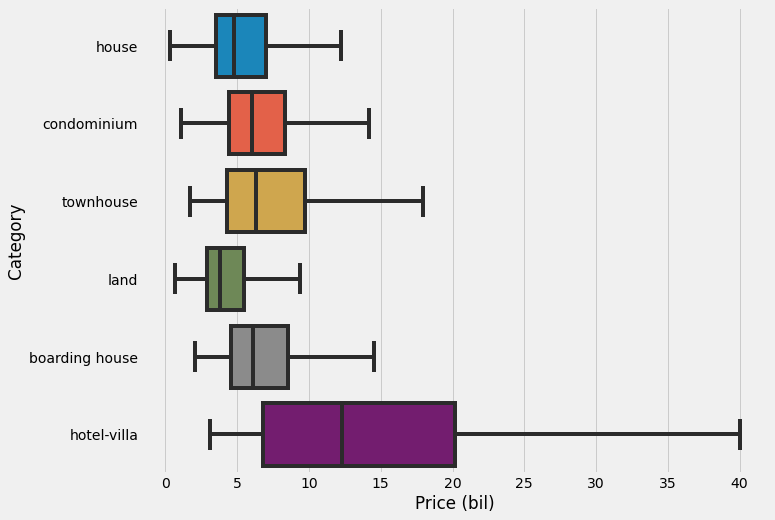

In [20]:
#Relationship between Category and House Price
plt.figure(figsize=(10,8))
sns.boxplot(y='Category',x='Price (bil)',data=df,showfliers=False)
plt.show()

In [21]:
#Encoding Category columns
labels_ordered=df.groupby(['Category'])['Price (bil)'].median().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}

old_df['Category'] = old_df['Category'].map(labels_ordered)
df['Category'] = df['Category'].map(labels_ordered)

### Cluster Analysis and PCA

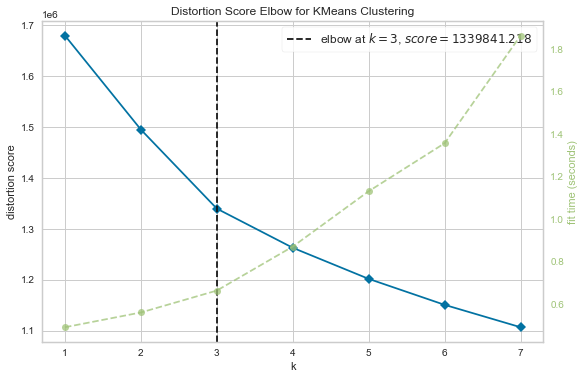

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

cluster_df = df.copy()
cluster_df = cluster_df.select_dtypes(exclude='O')

#Scale data
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(cluster_df),columns=cluster_df.columns)
X = scale_df.drop(['Price (bil)','Price/m2 (mil)'],axis=1)

#Find the best k cluster
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,8))
visualizer.fit(X)
visualizer.show()

In [23]:
#Use k = 3
kmeans = KMeans(n_clusters=3,max_iter=500)
kmeans.fit(X)
#Segmentation
df['Cluster'] = kmeans.predict(X)

In [24]:
#Analysis
df.groupby(['Cluster']).mean()

,District,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale,Category
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8.048438,5.444472,5.310415,2.966433,1.755680,1.997571,4.476569,4.940089,2.828841,1.892900,1.704109,8.529549,91.562675,2.175924,0.297465,0.227242,0.008004,0.007339,0.956078,0.920541,0.344760,0.813602,0.741914,0.727454,0.617628,0.287336,0.057890,0.298110,0.064885,3.182175
1,5.179218,0.053083,0.038418,2.822740,1.009695,2.000490,4.789143,0.125385,3.016160,1.979590,1.715881,5.320281,44.986792,0.033095,0.002543,0.000000,0.000098,0.000000,0.845001,0.813560,0.157280,0.632497,0.694431,0.560513,0.162300,0.069869,0.026857,0.110261,0.073333,0.029674
2,13.288292,3.221643,3.088808,2.953472,1.347390,2.003852,3.831476,4.549404,2.482434,1.666253,1.520203,7.771473,154.288516,2.463324,0.256943,0.228272,0.007491,0.025838,0.499490,0.362132,0.108662,0.348960,0.198282,0.128265,0.118878,0.082643,0.025876,0.135695,0.081425,2.333705


In [25]:
#PCA for visualization
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(X))
pca_df['Cluster'] = df['Cluster']
pca_df['Category'] = df['Category']

pca_df.head()

,0,1,Cluster,Category
0,-1.451687,-0.059868,2,1
1,-0.284439,0.470063,2,1
2,-1.333519,0.609837,2,1
3,-1.262693,1.655082,2,1
4,-1.846669,1.837341,2,2


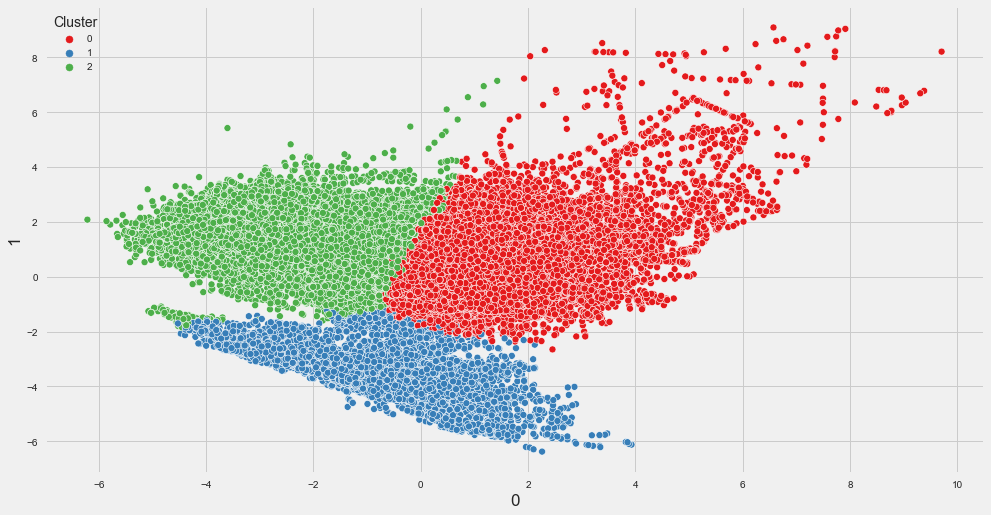

In [26]:
#PCA based on KMeans
plt.figure(figsize=(15,8))
sns.scatterplot(x=0,y=1,data=pca_df,hue=pca_df['Cluster'],palette='Set1')
plt.show()

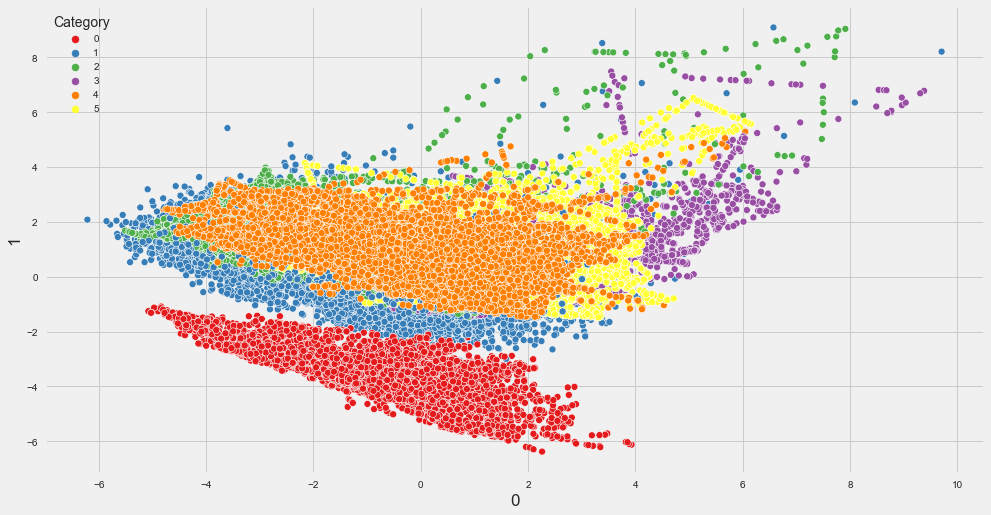

In [27]:
#PCA based on Category
plt.figure(figsize=(15,8))
sns.scatterplot(x=0,y=1,data=pca_df,hue=df['Category'],palette='Set1')
plt.show()

- We will split the data into data for Land and data for others.

In [28]:
land_df = df.loc[df['Category']==0].reset_index(drop=True)
home_df = df.loc[df['Category']!=0].reset_index(drop=True)

In [29]:
#Remove cluster column
home_df.drop('Cluster',axis=1,inplace=True)
land_df.drop('Cluster',axis=1,inplace=True)

## 4. Feature Selection

### Drop redundant features

In [30]:
land_df.describe().loc[['std']]

,District,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale,Category
std,4.828988,0.0,0.0,1.092296,0.095371,0.163102,0.890624,0.0,0.434976,0.483555,0.307013,4.896271,28.234473,0.0,0.0,0.0,0.0,0.0,0.340594,0.365682,0.330706,0.442961,0.42327,0.462208,0.330835,0.228296,0.139313,0.276883,0.230711,0.0


In [31]:
home_df.describe().loc[['std']]

,District,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale,Category
std,5.155438,4.116179,4.14794,0.849641,0.765808,0.112606,0.675094,0.633606,0.40716,0.322026,0.347807,6.003102,67.683824,0.94293,0.395918,0.378692,0.073236,0.102416,0.373215,0.414331,0.3795,0.423988,0.447294,0.448044,0.436102,0.357135,0.179925,0.370608,0.224567,1.405147


- We will drop some features that have zeros standard deviation.

In [32]:
land_df.drop([
    'Category','Bedroom','Bathroom','Land Used Area (m2)','Floor','Have Mezzanine','Have Rooftop','Have Basement','Have Attic'
],axis=1,inplace=True)

### Drop highly correlated features

- We will drop features that have correlation coefficient larger than 0.7

In [33]:
corr = land_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Direction,House Status,Verification,Land Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
District,1.000000,0.175524,0.018556,0.113652,0.324653,0.294189,0.289474,0.035024,0.192752,0.696596,0.000513,0.053197,0.140411,0.224609,0.052535,0.290057,0.283933,0.026566,0.064035,0.059700,0.187339
Direction,0.175524,1.000000,0.053075,0.005547,0.249929,0.214550,0.233631,0.242566,0.009872,0.208253,0.064008,0.065399,0.086720,0.032115,0.030969,0.272747,0.095904,0.056323,0.006769,0.092124,0.093864
House Status,0.018556,0.053075,1.000000,0.032236,0.040675,0.030301,0.044948,0.000737,0.060726,0.028152,0.014575,0.011301,0.012976,0.010319,0.005196,0.021330,0.028937,0.006224,0.000946,0.000862,0.041622
Verification,0.113652,0.005547,0.032236,1.000000,0.126703,0.103964,0.121122,0.039792,0.046657,0.142377,0.005447,0.012506,0.004419,0.038062,0.016952,0.028193,0.008865,0.003891,0.005115,0.013142,0.018782
Land Area (m2),0.324653,0.249929,0.040675,0.126703,1.000000,0.878680,0.897899,0.181552,0.539449,0.556830,0.023236,0.019094,0.067629,0.117691,0.069178,0.196926,0.107579,0.065522,0.027293,0.077864,0.049053
Length (m),0.294189,0.214550,0.030301,0.103964,0.878680,1.000000,0.611280,0.145515,0.460805,0.518635,0.009877,0.025670,0.072851,0.102304,0.031992,0.187483,0.081352,0.061831,0.009750,0.058599,0.053383
Width (m),0.289474,0.233631,0.044948,0.121122,0.897899,0.611280,1.000000,0.177941,0.481994,0.469412,0.036957,0.007072,0.052395,0.120527,0.098364,0.168530,0.107338,0.052954,0.028907,0.077293,0.030133
Alley Width (m),0.035024,0.242566,0.000737,0.039792,0.181552,0.145515,0.177941,1.000000,0.093366,0.194467,0.031050,0.009734,0.074805,0.095949,0.002871,0.141273,0.097421,0.139138,0.019408,0.117195,0.028214
Price (bil),0.192752,0.009872,0.060726,0.046657,0.539449,0.460805,0.481994,0.093366,1.000000,0.153185,0.045676,0.039951,0.038217,0.040436,0.048781,0.009959,0.059368,0.040899,0.071816,0.027672,0.005879
Price/m2 (mil),0.696596,0.208253,0.028152,0.142377,0.556830,0.518635,0.469412,0.194467,0.153185,1.000000,0.048572,0.115071,0.136621,0.120075,0.052791,0.162751,0.164321,0.111961,0.048471,0.089128,0.027019


In [34]:
land_drop = ['Length (m)','Width (m)','Near School']
land_df.drop(land_drop,axis=1,inplace=True)

In [35]:
corr = home_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale,Category
District,1.000000,0.116998,0.120885,0.013687,0.210231,0.031211,0.323980,0.047000,0.291826,0.207933,0.157758,0.281220,0.674423,0.272379,0.001386,0.045004,0.035337,0.107178,0.348032,0.415340,0.042678,0.217394,0.299456,0.400038,0.271101,0.143080,0.001614,0.077324,0.111835,0.144300
Bedroom,0.116998,1.000000,0.976314,0.027451,0.310220,0.015604,0.505082,0.509015,0.435993,0.389950,0.123631,0.360473,0.143609,0.120386,0.125518,0.072643,0.104274,0.014307,0.105793,0.121846,0.034179,0.064236,0.119590,0.086485,0.070168,0.063723,0.085208,0.039756,0.006641,0.130101
Bathroom,0.120885,0.976314,1.000000,0.047254,0.303482,0.007520,0.494811,0.517153,0.422602,0.389147,0.128800,0.365866,0.125474,0.144578,0.133511,0.103060,0.091383,0.018630,0.113722,0.122914,0.048528,0.076928,0.120420,0.091336,0.077980,0.072836,0.091728,0.027007,0.000395,0.146882
Direction,0.013687,0.027451,0.047254,1.000000,0.027422,0.110277,0.002086,0.003190,0.010601,0.006263,0.057694,0.009958,0.005450,0.013127,0.067626,0.007791,0.008964,0.020490,0.023387,0.004988,0.028138,0.035272,0.021905,0.015012,0.016135,0.024037,0.006716,0.055786,0.016701,0.116997
House Status,0.210231,0.310220,0.303482,0.027422,1.000000,0.012686,0.270669,0.030299,0.277335,0.144513,0.048675,0.060373,0.313174,0.342543,0.210486,0.190305,0.017271,0.023572,0.147785,0.205774,0.008255,0.030021,0.126961,0.194515,0.016312,0.061282,0.046082,0.039516,0.013195,0.055328
Verification,0.031211,0.015604,0.007520,0.110277,0.012686,1.000000,0.059280,0.058579,0.027715,0.062743,0.077364,0.030051,0.023532,0.020400,0.014471,0.006008,0.000264,0.002089,0.017453,0.015921,0.020825,0.022228,0.024905,0.022690,0.026977,0.061505,0.010236,0.002940,0.013446,0.084406
Land Area (m2),0.323980,0.505082,0.494811,0.002086,0.270669,0.059280,1.000000,0.695704,0.848132,0.750199,0.374733,0.538949,0.488206,0.174361,0.050759,0.038234,0.044912,0.039059,0.230478,0.261134,0.039494,0.117123,0.233669,0.219376,0.154876,0.167805,0.040158,0.035037,0.088363,0.382558
Land Used Area (m2),0.047000,0.509015,0.517153,0.003190,0.030299,0.058579,0.695704,1.000000,0.591259,0.535424,0.488731,0.671680,0.041482,0.438665,0.013085,0.340869,0.108668,0.009172,0.122493,0.108911,0.076034,0.062831,0.129085,0.064494,0.165376,0.210331,0.039295,0.036420,0.057396,0.378925
Length (m),0.291826,0.435993,0.422602,0.010601,0.277335,0.027715,0.848132,0.591259,1.000000,0.351286,0.347847,0.401479,0.444753,0.179210,0.081593,0.042982,0.026165,0.029353,0.199686,0.242833,0.006271,0.082984,0.213162,0.193961,0.133091,0.110261,0.059434,0.039607,0.080527,0.245689
Width (m),0.207933,0.389950,0.389147,0.006263,0.144513,0.062743,0.750199,0.535424,0.351286,1.000000,0.271383,0.511770,0.286854,0.082474,0.004115,0.016503,0.045253,0.039304,0.176232,0.178025,0.071621,0.114863,0.158845,0.166117,0.118804,0.171355,0.052614,0.007901,0.055478,0.423631


In [37]:
home_drop = ['Bedroom','Length (m)','Near School']
home_df.drop(home_drop,axis=1,inplace=True)

### Features importance

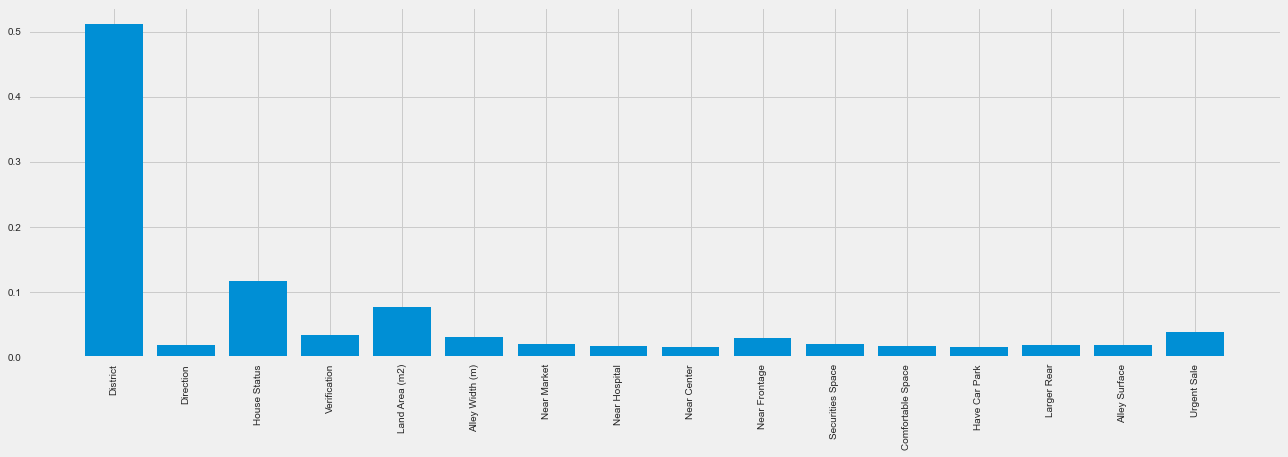

In [38]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

X = land_df.drop(['Price (bil)','Price/m2 (mil)'],axis=1)
y = land_df['Price/m2 (mil)']

model = XGBRegressor()
model.fit(X,y)

plt.figure(figsize=(20,6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(ticks=range(len(list(X.columns))),labels = list(X.columns),rotation=90)
plt.show()

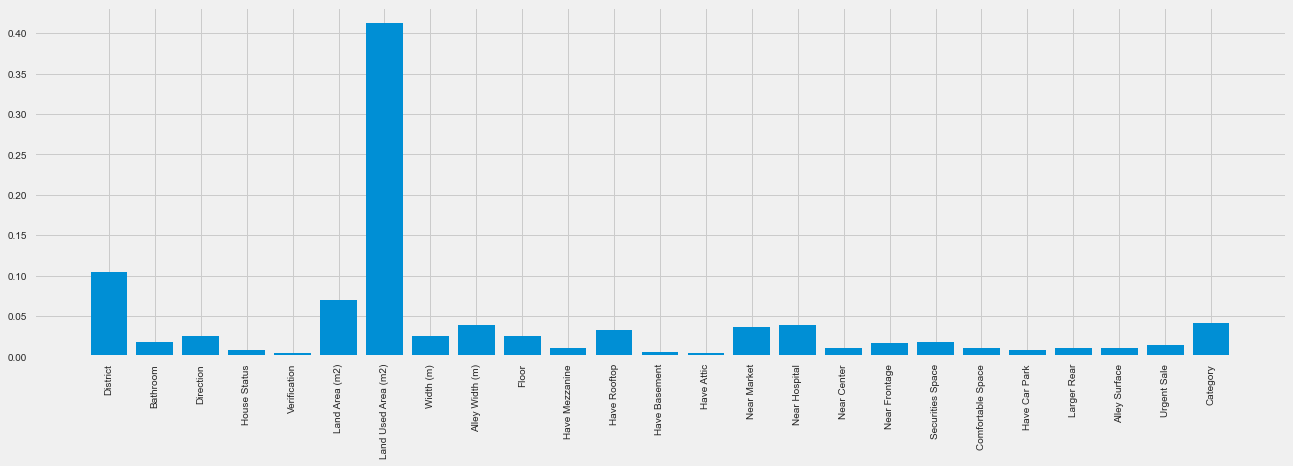

In [39]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

X = home_df.drop(['Price (bil)','Price/m2 (mil)'],axis=1)
y = home_df['Price (bil)']

model = XGBRegressor()
model.fit(X,y)

plt.figure(figsize=(20,6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(ticks=range(len(list(X.columns))),labels = list(X.columns),rotation=90)
plt.show()

### Remove anomaly observations

In [40]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=3107,max_features=27)
clf.fit(home_df)

home_df['Anomalies'] = clf.predict(home_df)
home_df = home_df[home_df['Anomalies']==1]
home_df.drop('Anomalies',axis=1,inplace=True)
home_df.reset_index(drop=True,inplace=True)

In [ ]:
home_df.to_csv('data/train.csv',index=False)